# Spanish Semantic Textual Similarity

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
language = "Spanish"
train = pd.read_csv("train.csv", sep="\t")
test = pd.read_csv("test.csv", sep="\t")

Let's see what are the rows in train and test datasets

In [4]:
train[:10]

,id,sentence_1,sentence_2,similarity
0,0,"El presidente uruguayo, José Mujica, dio a ent...","El presidente uruguayo, José Mujica, fue recib...",1.6
1,1,Reportes de la prensa local y testigos en el n...,Un grupo de cazadores y vigilantes locales han...,1.4
2,2,"Utilizamos las fuerzas policiales, con sus equ...","Jens Modvig, relator para Venezuela, inició el...",1.6
3,3,"""La situación militar en la zona se ha complic...","Tras una operación organizada el sábado, unas ...",0.2
4,4,El incidente aterrador comenzó en el lado sur ...,Todo comenzó en el costado sur del edificio ub...,1.4
5,5,"El último dirigente de la Unión Soviética, Mij...","En estas conmemoraciones, Gorbachov prevé reun...",2.2
6,6,"Se dijo que tras la detención, el capo fue tra...",El hijo de Ismael Mayo Zambada y quien quedó a...,1.8
7,7,"El CEO de Facebook, Mark Zuckerberg se enfrent...","Mark Zuckerberg, el CEO de la compañía, se enc...",3.2
8,8,"""La última persona que está siendo supervisada...","“Sus ojos estaban muy abiertos, pero no eran s...",1.2
9,9,Sobre los restos que no son de los normalistas...,"""El EAAF ha obtenido resultados genéticos del ...",1.8


In [5]:
train.describe()

,id,similarity
count,1620.000000,1620.000000
mean,809.500000,2.027043
std,467.798033,1.049649
min,0.000000,0.000000
25%,404.750000,1.400000
50%,809.500000,2.000000
75%,1214.250000,2.800000
max,1619.000000,4.000000


In [6]:
test[:10]

,id,sentence_1,sentence_2,similarity
0,0,Un perro está con un juguete.,Un perro tiene un juguete.,4.8
1,1,Los niños acarician un conejito.,Los niños acarician un perro.,2.2
2,2,La gente cocina en la parrilla.,Los peatones miran con asombro mientras dos pe...,0.8
3,3,El hombre construye un pequeño castillo de arena,Una muchacha está construyendo un castillo de ...,2.2
4,4,Un hombre está corriendo detrás de un trineo t...,Un hombre siendo tirado en un trineo por perros.,3.6
5,5,Una persona haciendo rapel.,Una persona esta haciendo rapel,5.0
6,6,La gente está esperando piezas de autos.,La gente está esperando por el auto.,1.2
7,7,"El hombre está emocionado, ya que esta es su p...",Un hombre está tocando un instrumento que él c...,0.4
8,8,Una muchacha en un vestido rosado está parada ...,Una mujer de rosado está cubriendo su rostro c...,0.4
9,9,Un hombre está apilando grupos de rocas junto ...,La banda está tocando dentro de un pequeño clu...,0.4


In [7]:
def convert(row):
    if row['similarity'] <= 1.0:
        return '0-1'
    elif 1.0 < row['similarity'] <= 2.0:
        return '1-2'
    elif 2.0 < row['similarity'] <= 3.0:
        return '2-3'
    elif 3.0 < row['similarity'] <= 4.0:
        return '3-4'
    else:
        return '4-5'

train['category'] = train.apply(convert, axis=1)
test['category'] = test.apply(convert, axis=1)

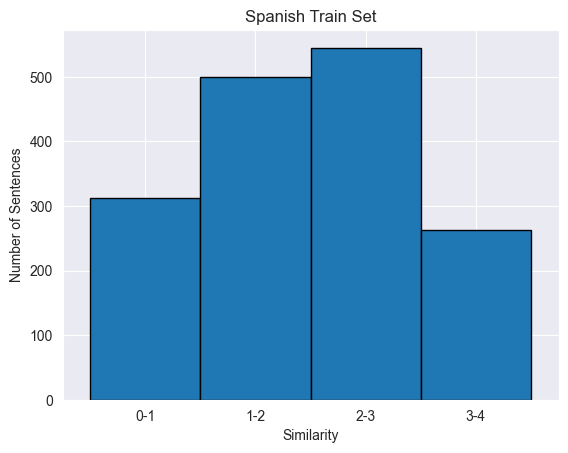

In [8]:
train.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Train Set")
plt.show()

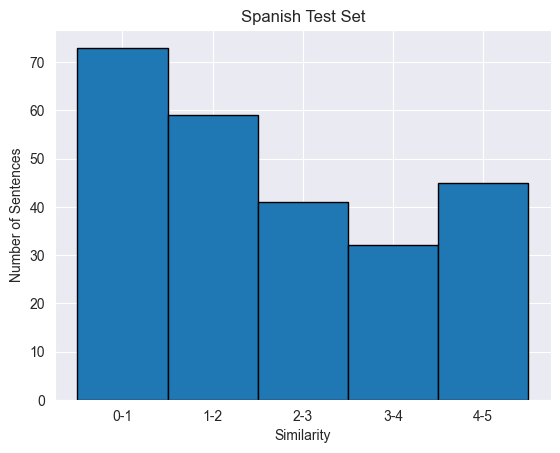

In [9]:
test.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Test Set")
plt.show()

In [10]:
def normalized_word_Common(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0* len(w1 & w2)

def normalized_word_Total(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1* (len(w1) + len(w2))

def normalized_word_share(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0*len(w1 & w2) / (len(w1) + len(w2))

def prepare_frequencies(df, id_column, column_1, column_2):
    df['freq_1'] = df.groupby(id_column)[id_column].transform('count')
    df['freq_2'] = df.groupby(id_column)[id_column].transform('count')
    df['s1len'] = df[column_1].str.len()
    df['s2len'] = df[column_2].str.len()
    df['s1_n_words'] = df[column_1].apply(lambda row :len(row.split(" ")))
    df['s2_n_words'] = df[column_2].apply(lambda row :len(row.split(" ")))

    df['word_Common'] = df.apply(normalized_word_Common, args=(column_1,column_2), axis=1)
    df['word_Total'] = df.apply(normalized_word_Total, args=(column_1,column_2), axis = 1)
    df['word_share'] = df.apply(normalized_word_share, args=(column_1,column_2), axis = 1)

    df['freq_s1+s2'] = df['freq_1'] + df['freq_2']
    df['freq_s1-s2'] = abs(df['freq_1'] - df['freq_2'])

    return df


In [11]:
train = prepare_frequencies(train, "id", "sentence_1", "sentence_2")
test = prepare_frequencies(test, "id", "sentence_1", "sentence_2")

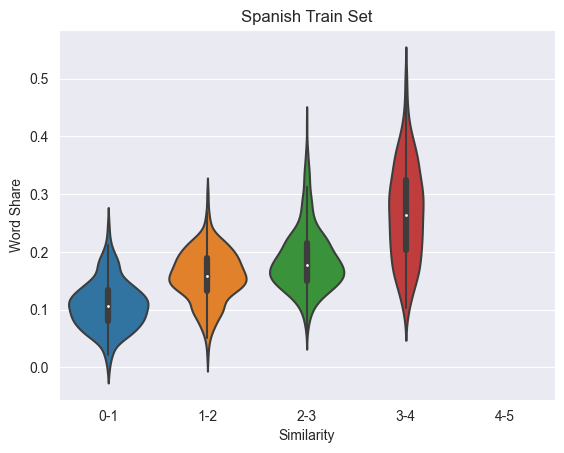

In [12]:
ax = sns.violinplot(x = 'category', y='word_share', data = train[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Train Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

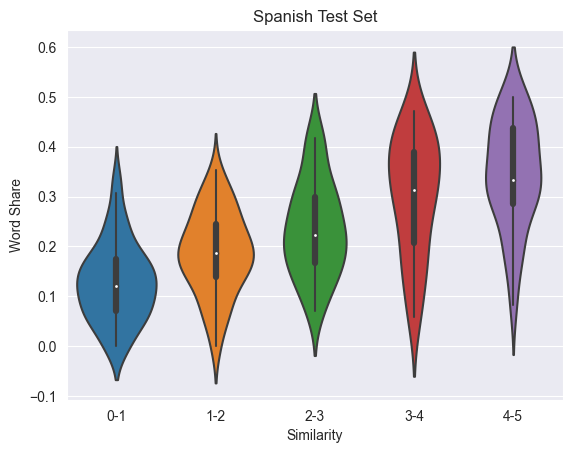

In [13]:
ax = sns.violinplot(x = 'category', y='word_share', data = test[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Test Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

In [14]:
train[:10]

,id,sentence_1,sentence_2,similarity,category,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
0,0,"El presidente uruguayo, José Mujica, dio a ent...","El presidente uruguayo, José Mujica, fue recib...",1.6,1-2,1,1,197,210,34,33,12.0,59,0.203390,2,0
1,1,Reportes de la prensa local y testigos en el n...,Un grupo de cazadores y vigilantes locales han...,1.4,1-2,1,1,150,214,26,36,12.0,55,0.218182,2,0
2,2,"Utilizamos las fuerzas policiales, con sus equ...","Jens Modvig, relator para Venezuela, inició el...",1.6,1-2,1,1,171,176,26,27,11.0,50,0.220000,2,0
3,3,"""La situación militar en la zona se ha complic...","Tras una operación organizada el sábado, unas ...",0.2,0-1,1,1,83,215,14,33,4.0,44,0.090909,2,0
4,4,El incidente aterrador comenzó en el lado sur ...,Todo comenzó en el costado sur del edificio ub...,1.4,1-2,1,1,96,188,18,32,6.0,43,0.139535,2,0
5,5,"El último dirigente de la Unión Soviética, Mij...","En estas conmemoraciones, Gorbachov prevé reun...",2.2,2-3,1,1,185,131,31,19,7.0,44,0.159091,2,0
6,6,"Se dijo que tras la detención, el capo fue tra...",El hijo de Ismael Mayo Zambada y quien quedó a...,1.8,1-2,1,1,179,220,28,36,11.0,53,0.207547,2,0
7,7,"El CEO de Facebook, Mark Zuckerberg se enfrent...","Mark Zuckerberg, el CEO de la compañía, se enc...",3.2,3-4,1,1,181,165,29,28,9.0,49,0.183673,2,0
8,8,"""La última persona que está siendo supervisada...","“Sus ojos estaban muy abiertos, pero no eran s...",1.2,1-2,1,1,288,199,48,33,4.0,69,0.057971,2,0
9,9,Sobre los restos que no son de los normalistas...,"""El EAAF ha obtenido resultados genéticos del ...",1.8,1-2,1,1,199,160,32,25,14.0,52,0.269231,2,0


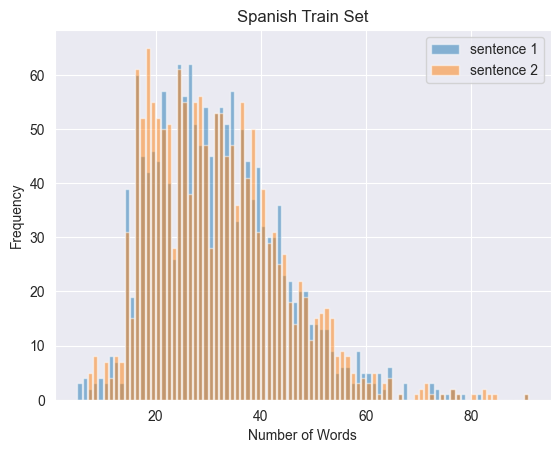

In [15]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(train['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(train['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Train Set")
plt.legend()
plt.show()

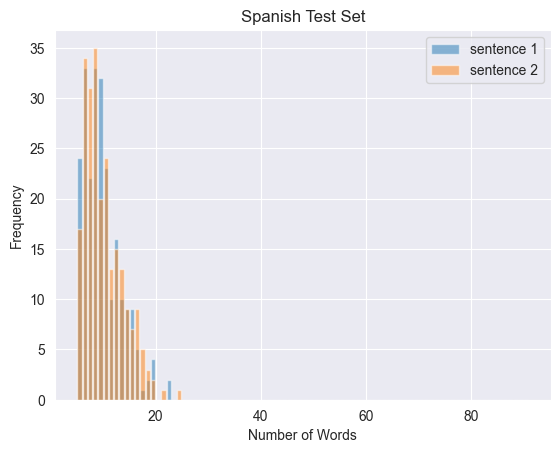

In [16]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(test['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(test['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Test Set")
plt.legend()
plt.show()

In [17]:
train.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,1620.000000,1620.000000,1620.0,1620.0,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.0,1620.0
mean,809.500000,2.027043,1.0,1.0,186.937654,184.797531,31.231481,31.041358,9.540123,51.772840,0.175664,2.0,0.0
std,467.798033,1.049649,0.0,0.0,74.361780,75.254296,12.148865,12.378832,6.225453,15.294321,0.073747,0.0,0.0
min,0.000000,0.000000,1.0,1.0,25.000000,9.000000,5.000000,1.000000,0.000000,12.000000,0.000000,2.0,0.0
25%,404.750000,1.400000,1.0,1.0,130.000000,126.750000,22.000000,21.000000,6.000000,41.000000,0.128825,2.0,0.0
50%,809.500000,2.000000,1.0,1.0,180.000000,174.000000,30.000000,29.000000,8.000000,50.000000,0.166667,2.0,0.0
75%,1214.250000,2.800000,1.0,1.0,230.250000,233.000000,39.000000,38.000000,12.000000,62.000000,0.209677,2.0,0.0
max,1619.000000,4.000000,1.0,1.0,549.000000,517.000000,90.000000,91.000000,54.000000,122.000000,0.500000,2.0,0.0


In [18]:
test.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,250.000000,250.000000,250.0,250.0,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.0,250.0
mean,124.500000,2.231200,1.0,1.0,49.836000,51.22400,9.028000,9.344000,3.644000,17.268000,0.220845,2.0,0.0
std,72.312977,1.587244,0.0,0.0,19.823547,19.92692,3.659616,3.740807,2.157751,5.677067,0.122784,0.0,0.0
min,0.000000,0.000000,1.0,1.0,18.000000,13.00000,3.000000,3.000000,0.000000,6.000000,0.000000,2.0,0.0
25%,62.250000,0.800000,1.0,1.0,35.000000,36.00000,6.000000,7.000000,2.000000,13.000000,0.130435,2.0,0.0
50%,124.500000,2.000000,1.0,1.0,47.000000,47.00000,8.000000,8.000000,3.000000,16.000000,0.200000,2.0,0.0
75%,186.750000,3.600000,1.0,1.0,59.000000,62.00000,11.000000,12.000000,5.000000,21.000000,0.307692,2.0,0.0
max,249.000000,5.000000,1.0,1.0,136.000000,129.00000,22.000000,24.000000,14.000000,37.000000,0.500000,2.0,0.0
